**Simple Image Classification Experiments**

We now use CIFAR10, also provided by Keras. 

In [1]:
# Starts with imports
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Loading dataset 
# It is important to normalise the data
cifar10 = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0


170500096/170498071 [==============================] - 12s 0us/step


In [3]:
# Getting to know the data
# 50000 training images, 32*32*3 (RGB 3 channels)
# 10000 test images
# airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.
print(x_train.shape)
print(x_test.shape)
class_names = ["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

(50000, 32, 32, 3)
(10000, 32, 32, 3)


**Task 1**. Write Python code to show some training and test images and their categories

frog


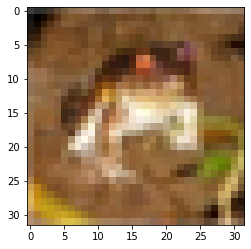

In [4]:
# show an image
plt.imshow(x_train[0, ])
print(class_names[y_train[0][0]])
plt.show()

**Task 2**: Build an MLP with 1 hidden layer of 300 neurons. Use the same activation, loss, and SGD as the example in the lecture. Train the neural network using 10% for validation. Work out the performance on the test set.

**Hint**: The input_shape needs to be adjusted to match the input image size (including 3 channels).

**Hint** Plot the curves of accuracy/loss for training/validation sets to see how well the training process works.

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(), metrics = ["accuracy"])
history = model.fit(x_train, y_train, epochs = 50, validation_split=0.1)
model.evaluate(x_test, y_test)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 6s 143us/sample - loss: 1.8831 - acc: 0.3193 - val_loss: 1.7682 - val_acc: 0.3562
Epoch 2/50
45000/45000 [==============================] - 5s 107us/sample - loss: 1.7148 - acc: 0.3848 - val_loss: 1.6969 - val_acc: 0.3916
Epoch 3/50
45000/45000 [==============================] - 5s 107us/sample - loss: 1.6532 - acc: 0.4144 - val_loss: 1.6576 - val_acc: 0.4078
Epoch 4/50
45000/45000 [==============================] - 5s 106us/sample - loss: 1.6147 - acc: 0.4210 - val_loss: 1.6263 - val_acc: 0.4170
Epoch 5/50
45000/45000 [==============================] - 5s 107us/sample - loss: 1.5898 - acc: 0.4331 - val_loss: 1.6440 - val_acc: 0.4200
Epoch 6/50
45000/45000 [==============================] - 5s 108us/sample - loss: 1.5702 - acc: 0.4415 - val_loss: 1.6079 - val_acc: 0.4316
Epoch 7/50
45000/45000 [======

[1.5127527420043945, 0.4728]

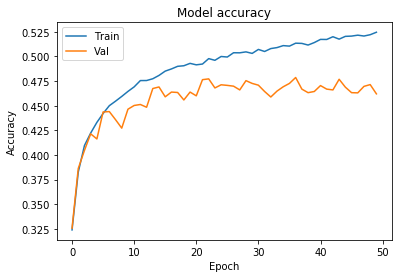

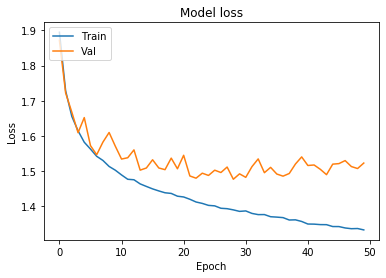

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

**Task 3**: Increase the hidden layers to 2 and 4 (still with the same number of neurons for each hidden layer. Observe the performance on the training / validation and test sets.

Particularly notice the performance gap between the training and validation/test sets. What do you find?


In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(), metrics = ["accuracy"])
history = model.fit(x_train, y_train, epochs = 30, validation_split=0.1)
model.evaluate(x_test, y_test)

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
45000/45000 [==============================] - 5s 107us/sample - loss: 1.8558 - acc: 0.3297 - val_loss: 1.7300 - val_acc: 0.3772
Epoch 2/30
45000/45000 [==============================] - 5s 101us/sample - loss: 1.6796 - acc: 0.3989 - val_loss: 1.6516 - val_acc: 0.4060
Epoch 3/30
45000/45000 [==============================] - 5s 104us/sample - loss: 1.6073 - acc: 0.4251 - val_loss: 1.6426 - val_acc: 0.4210
Epoch 4/30
45000/45000 [==============================] - 5s 103us/sample - loss: 1.5616 - acc: 0.4430 - val_loss: 1.5711 - val_acc: 0.4470
Epoch 5/30
45000/45000 [==============================] - 5s 103us/sample - loss: 1.5249 - acc: 0.4507 - val_loss: 1.5491 - val_acc: 0.4584
Epoch 6/30
45000/45000 [==============================] - 5s 101us/sample - loss: 1.5006 - acc: 0.4641 - val_loss: 1.5872 - val_acc: 0.4342
Epoch 7/30
45000/45000 [==============================] - 5s 103us/sample - loss: 1.4782 - acc: 0.4701 - val_lo

[1.5057119272232056, 0.4802]

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(), metrics = ["accuracy"])
history = model.fit(x_train, y_train, epochs = 30, validation_split=0.1)
model.evaluate(x_test, y_test)

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
45000/45000 [==============================] - 5s 113us/sample - loss: 1.9259 - acc: 0.3061 - val_loss: 1.7858 - val_acc: 0.3496
Epoch 2/30
45000/45000 [==============================] - 5s 116us/sample - loss: 1.7171 - acc: 0.3834 - val_loss: 1.7263 - val_acc: 0.3760
Epoch 3/30
45000/45000 [==============================] - 5s 110us/sample - loss: 1.6281 - acc: 0.4176 - val_loss: 1.6705 - val_acc: 0.4014
Epoch 4/30
45000/45000 [==============================] - 5s 110us/sample - loss: 1.5632 - acc: 0.4434 - val_loss: 1.5915 - val_acc: 0.4370
Epoch 5/30
45000/45000 [==============================] - 5s 111us/sample - loss: 1.5146 - acc: 0.4609 - val_loss: 1.5337 - val_acc: 0.4548
Epoch 6/30
45000/45000 [==============================] - 5s 112us/sample - loss: 1.4728 - acc: 0.4758 - val_loss: 1.5607 - val_acc: 0.4506
Epoch 7/30
45000/45000 [==============================] - 5s 112us/sample - loss: 1.4390 - acc: 0.4856 - val_lo

[1.573762199783325, 0.4734]

**Task 4**: For the case with 2 hidden layers, add a Batch Normalization layer after each layer. How does this affect the performance?




In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(), metrics = ["accuracy"])
history = model.fit(x_train, y_train, epochs = 30, validation_split=0.1)
model.evaluate(x_test, y_test)

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
45000/45000 [==============================] - 9s 205us/sample - loss: 1.7420 - acc: 0.3922 - val_loss: 1.5632 - val_acc: 0.4602
Epoch 2/30
45000/45000 [==============================] - 9s 198us/sample - loss: 1.4985 - acc: 0.4715 - val_loss: 1.4469 - val_acc: 0.4922
Epoch 3/30
45000/45000 [==============================] - 9s 197us/sample - loss: 1.3942 - acc: 0.5076 - val_loss: 1.4343 - val_acc: 0.4984
Epoch 4/30
45000/45000 [==============================] - 9s 200us/sample - loss: 1.3235 - acc: 0.5318 - val_loss: 1.4672 - val_acc: 0.4922
Epoch 5/30
45000/45000 [==============================] - 9s 196us/sample - loss: 1.2690 - acc: 0.5525 - val_loss: 1.3751 - val_acc: 0.5234
Epoch 6/30
45000/45000 [==============================] - 9s 197us/sample - loss: 1.2171 - acc: 0.5705 - val_loss: 1.3649 - val_acc: 0.5250
Epoch 7/30
45000/45000 [==============================] - 9s 198us/sample - loss: 1.1663 - acc: 0.5886 - val_lo

[1.727539743232727, 0.5162]

**Task 5**: Try different optimizers, especially Adam. Adjust parameters for learning rate etc. and observe how different settings affect training.

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(), metrics = ["accuracy"])
history = model.fit(x_train, y_train, epochs = 30, validation_split=0.1)
model.evaluate(x_test, y_test)

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
45000/45000 [==============================] - 10s 220us/sample - loss: 1.7327 - acc: 0.3890 - val_loss: 1.5321 - val_acc: 0.4588
Epoch 2/30
45000/45000 [==============================] - 10s 213us/sample - loss: 1.5120 - acc: 0.4638 - val_loss: 1.4359 - val_acc: 0.4948
Epoch 3/30
45000/45000 [==============================] - 10s 212us/sample - loss: 1.4194 - acc: 0.4965 - val_loss: 1.3818 - val_acc: 0.5134
Epoch 4/30
45000/45000 [==============================] - 9s 208us/sample - loss: 1.3412 - acc: 0.5236 - val_loss: 1.3334 - val_acc: 0.5290
Epoch 5/30
45000/45000 [==============================] - 10s 212us/sample - loss: 1.2760 - acc: 0.5458 - val_loss: 1.3142 - val_acc: 0.5410
Epoch 6/30
45000/45000 [==============================] - 9s 211us/sample - loss: 1.2318 - acc: 0.5620 - val_loss: 1.3201 - val_acc: 0.5402
Epoch 7/30
45000/45000 [==============================] - 9s 211us/sample - loss: 1.1771 - acc: 0.5819 - va

[1.6950680906295776, 0.5407]

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=0.01, momentum = 0.9, decay=1e-4), metrics = ["accuracy"])
history = model.fit(x_train, y_train, epochs = 30, validation_split=0.1)
model.evaluate(x_test, y_test)

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
45000/45000 [==============================] - 10s 219us/sample - loss: 1.7960 - acc: 0.3794 - val_loss: 1.5390 - val_acc: 0.4572
Epoch 2/30
45000/45000 [==============================] - 9s 208us/sample - loss: 1.5277 - acc: 0.4590 - val_loss: 1.4474 - val_acc: 0.4868
Epoch 3/30
45000/45000 [==============================] - 10s 212us/sample - loss: 1.4105 - acc: 0.5009 - val_loss: 1.3809 - val_acc: 0.5066
Epoch 4/30
45000/45000 [==============================] - 9s 209us/sample - loss: 1.3187 - acc: 0.5301 - val_loss: 1.3348 - val_acc: 0.5296
Epoch 5/30
45000/45000 [==============================] - 10s 213us/sample - loss: 1.2467 - acc: 0.5557 - val_loss: 1.3265 - val_acc: 0.5328
Epoch 6/30
45000/45000 [==============================] - 9s 207us/sample - loss: 1.1899 - acc: 0.5746 - val_loss: 1.3219 - val_acc: 0.5422
Epoch 7/30
45000/45000 [==============================] - 9s 207us/sample - loss: 1.1288 - acc: 0.5985 - val

[1.7440075366973877, 0.5292]

**Don't worry too much about the performance you got so far. We will learn more effective methods for images, including Convolutional Neural Networks.**